# **Introduction to Neural Network**

## Simple Logistic Regression (Binary)

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#FF000", "#0000FF"])
cmap_light = ListedColormap(["#FFBBBB", "#BBBBFF"])

### Useful Functions
Losses
activations
metrics

In [3]:
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p_hat):
    return - (1/len(y)) * np.sum(y*np.log(p_hat) + (1-y)* np.log(1 - p_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

## Binary Logistic Regression Class

In [4]:
class LogisticRegression:

    def __init__(self, thresh=0.5):
        self.thresh = thresh
        self.W = None
        self.b = None
    
    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape

        # Initialize  Weights and biases:
        self.W = np.random.randn(D)
        self.b = np.random.randn(1)

        # Create Zero valued container for J
        J = np.zeros(epochs)

        # SGD
        for epoch in range(epochs):
            p_hat = self.__forward__(X)
            J[epoch] = cross_entropy(y, p_hat)

            # Weight and biases Update Rules
            self.W -= eta * (1/N) * X.T@(p_hat - y)
            self.b -= eta * (1/N) * np.sum(p_hat - y)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Trainning Curve")

    def __forward__(self, X):
        return sigmoid(X @ self.W + self.b)
    
    def predict(self, X):
        return (self.__forward__(X) >= self.thresh).astype(np.int32)


<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Younes Abaroudi\AppData\Local\Temp\ipykernel_7788\3963405521.py:32: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{J}$")


In [6]:
def main():
    N = 1000
    D = 2

    X0 = np.random.randn((N//2),D) + np.array([1, 1])
    X1 = np.random.randn((N//2),D) + np.array([-1, -1.5])
    X = np.vstack((X0, X1))

    y = np.array([0]*(N//2) + [1]*(N//2))

    plt.figure()
    plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
    plt.show()

    log_reg = LogisticRegression()
    log_reg.fit(X, y, epochs = 1e4, eta= 1e-2, show_curve=True)
    y_hat = log_reg.predict(X)

    print(f"Trainning Accuracy: {accuracy(y, y_hat): 0.4f}")
    print(log_reg.W)
    print(log_reg.b)

    x1 = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 1000)
    x2 = -(log_reg.b/log_reg.W[1]) -(log_reg.W[0]/log_reg.W[1])*x1

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=7, alpha=0.4)
    plt.plot(x1, x2, color="#000000")

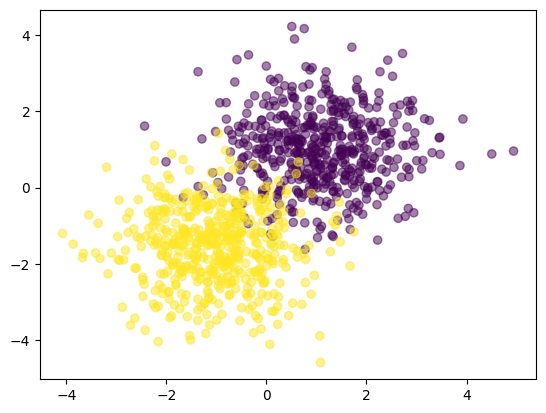

Trainning Accuracy:  0.9520
[-1.91600716 -2.38900418]
[-0.6394564]


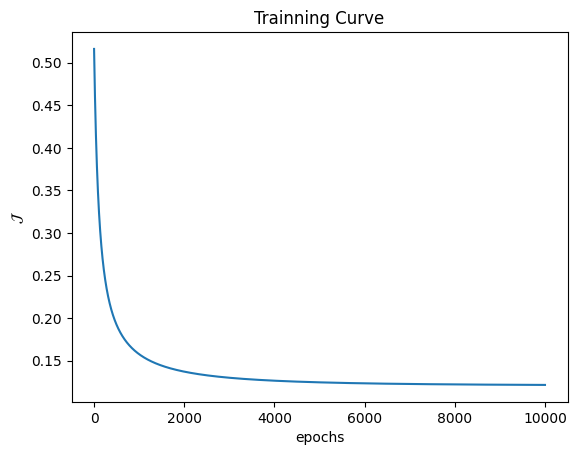

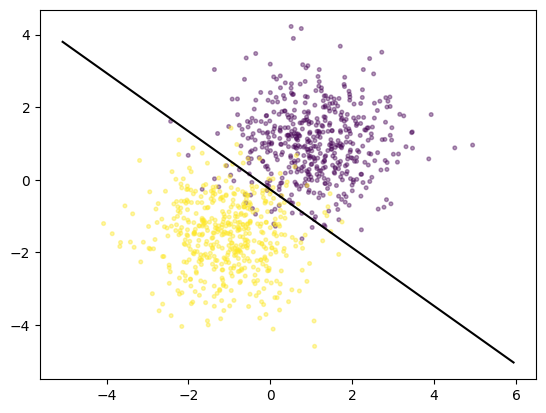

In [7]:
if __name__=="__main__":
    main()

## Multi Class Logistic Regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Useful Functions

In [9]:
def softmax(H):
    return (np.exp(H.T)/np.sum(np.exp(H), axis=1)).T

def cat_cross_entropy(Y, P_hat):
    return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis=1), axis=0)

def indices_to_one_hot(data, nb_classes):
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [10]:
# y = np.array([0, 0, 1, 2, 1, 0])
# Y = indices_to_one_hot(y, 3).astype(int)
# Y

### MV Logistic Regression Class

In [11]:
class MVLogisticRegression():

    def fit(self, X, y, eta=1e-3, epochs = 1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape
        K = len(np.unique(y))
        Y = indices_to_one_hot(y, K).astype(int)

        # Initialize Weights:
        self.W = np.random.randn(D, K)
        self.B =np.random.randn(K)

        J = np.zeros(epochs)
        #  SGD
        for epoch in range(epochs):
            P_hat = self.__forward__(X)
            J[epoch] = cat_cross_entropy(Y, P_hat)

            # Weight Update rules
            self.W -= eta * (1/N) * X.T@(P_hat-Y)
            self.B -= eta*(1/N)*np.sum(P_hat-Y, axis=0)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel(r"$\mathcal{J}$")
            plt.title("Trainning Curve")

    def __forward__(self, X):
        return softmax(X@self.W + self.B)
    
    def predict(self, X):
        return np.argmax(self.__forward__(X), axis=1)

### Class Implementation and example

In [12]:
data = pd.read_csv("dataset/TripGaussKNN.csv")
data

,Unnamed: 0,0,1,2
0,0,2.769395,0.762216,0
1,1,1.519271,1.487948,0
2,2,2.407084,2.836605,0
3,3,1.276534,1.396749,0
4,4,0.380165,4.396517,0
...,...,...,...,...
2995,2995,-3.537007,3.431588,2
2996,2996,-1.709969,2.675040,2
2997,2997,-2.098664,2.084230,2
2998,2998,-1.523310,1.083698,2


In [13]:
y = data["2"].to_numpy()
X = data[["0", "1"]].to_numpy()

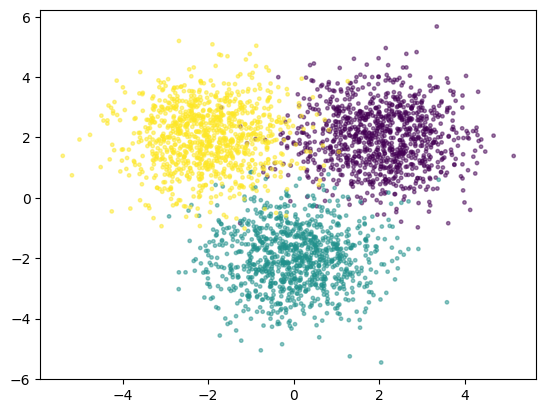

In [14]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=6, alpha=0.5)

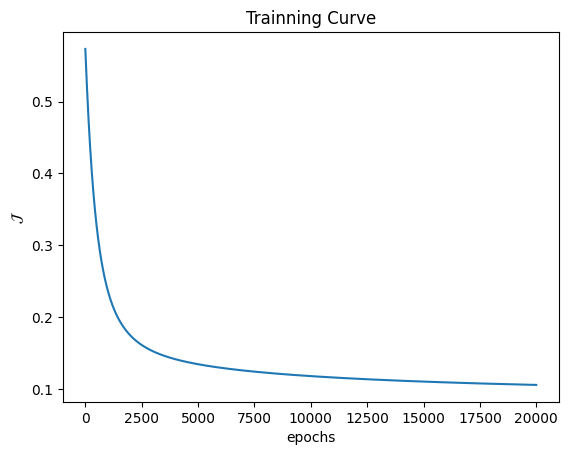

In [15]:
mv_logreg = MVLogisticRegression()
mv_logreg.fit(X, y, epochs=2e4, show_curve=True)


In [16]:
mv_logreg.W

array([[ 1.9831739 ,  0.74914379, -0.53694201],
       [ 0.74048082, -1.59251773,  0.71066255]])

In [17]:
mv_logreg.B

array([-1.0713241 ,  0.03220747, -1.05607664])

In [18]:
y_hat = mv_logreg.predict(X)

In [19]:
accuracy(y, y_hat)

np.float64(0.969)

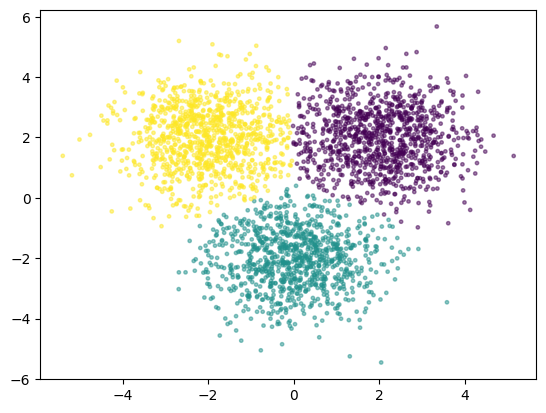

In [20]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_hat, s=6, alpha=0.5)

## Two-Layer Feed Forward Perception

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Activation Function

In [22]:
def linear(H):
    return H

def ReLU(H): # Rectifier Linear Unit
    return H *(H>0)

def sigmoid(H):
    return 1 / (1 + np.exp(-H))

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis=1, keepdims=True)

# np.tanh

## Useful Functions

In [23]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N, K))
    for i in range(N):
        Y[i, y[i]] = 1
    return Y

def cross_entropy(Y, P_hat):
    return - np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

## Shallow ANN Class

In [24]:
class Shallow_ANN():
   
    def fit(self, X, y, neurons=6, eta=1e-3, epochs=1e3, show_curve=True):
        epochs = int(epochs)
        N, D = X.shape
        Y = one_hot_encode(y)
        K = Y.shape[1]
 
        # Weight Initialization
        self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D, neurons], [neurons, K]), 1)}
        self.B = {l: np.random.randn(M) for l, M in enumerate([neurons, K], 1)}
 
        # Define Activations
        self.a = {1: np.tanh, 2: softmax}
 
        J = np.zeros(epochs)
 
        # SGD Steps
        for epoch in range(epochs):
            self.__forward__(X)
            J[epoch] = cross_entropy(Y, self.Z[2])
           
            # Weight Update Rules for output layer (Layer 2)
            self.W[2] -= eta * (1/N) * self.Z[1].T @ (self.Z[2] - Y)
            self.B[2] -= eta * (1/N) * (self.Z[2] - Y).sum(axis=0)
           
            # Weight Update Rule for Layer 1
            self.W[1] -= eta * (1/N) * X.T @ ((self.Z[2] - Y) @ self.W[2].T * (1 - self.Z[1]**2))
            self.B[1] -= eta * (1/N) * ((self.Z[2] - Y) @ self.W[2].T * (1 - self.Z[1]**2)).sum(axis=0)
 
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("Epochs")
            plt.ylabel(r"$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()
 
    def __forward__(self, X):
        self.Z = {0: X}
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1] @ self.W[l] + self.B[l])
 
    def predict(self, X):
        self.__forward__(X)
        return self.Z[2].argmax(axis=1)  # Fixed 'argnax' to 'argmax'

In [25]:
def main():
  D =2
  K = 3
  N= int(K*1e3)

  X0= np.random.randn((N//K),D) + np.array([2,2])
  X1= np.random.randn((N//K),D) + np.array([0,-2])
  X2= np.random.randn((N//K),D) + np.array([-2,2])
  X=np.vstack((X0,X1,X2))

  y=np.array([0]*(N//K)+ [1]*(N//K)+ [2]*(N//K))

  plt.figure()
  plt.scatter(X[:,0],X[:,1], c=y , s= 5)

  my_ann = Shallow_ANN()
  my_ann.fit(X, y, neurons= 3, eta=1e-2, epochs = 3e4, show_curve= True )
  y_hat =my_ann.predict(X)

  print("Accuracy: ", accuracy(y, y_hat))
  print(my_ann.W)
  print(my_ann.B)

  plt.figure()
  plt.scatter(X[:,0],X[:,1], c=y_hat , s= 5)

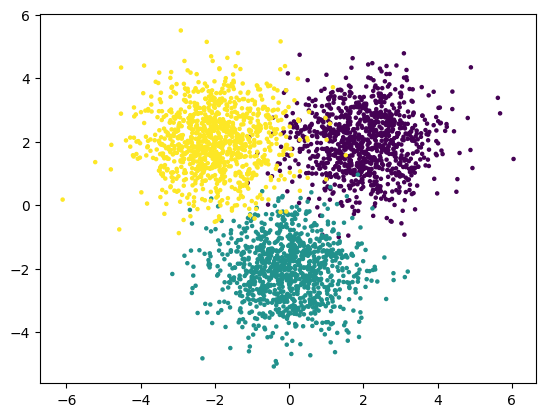

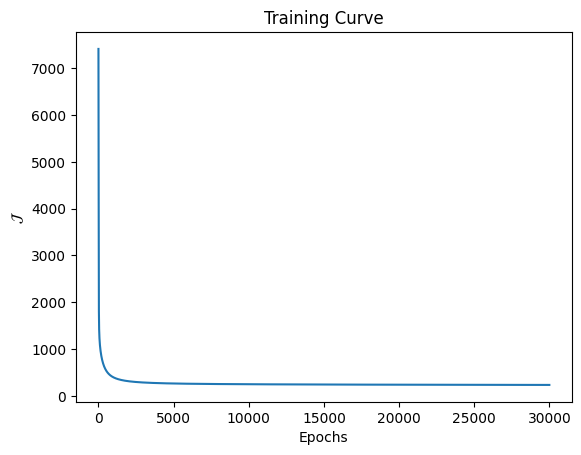

Accuracy:  0.975
{1: array([[-0.22321056, -0.73778223, -0.95270043],
       [-0.90155046,  0.93922932, -0.07544585]]), 2: array([[-2.61235666,  2.23252844, -1.60196734],
       [-0.28887678, -1.81361393,  1.70007704],
       [-1.30236696,  1.07898349,  3.39266221]])}
{1: array([ 0.01621943, -0.5969577 ,  0.12135496]), 2: array([-1.04149756, -0.52089171, -1.36714859])}


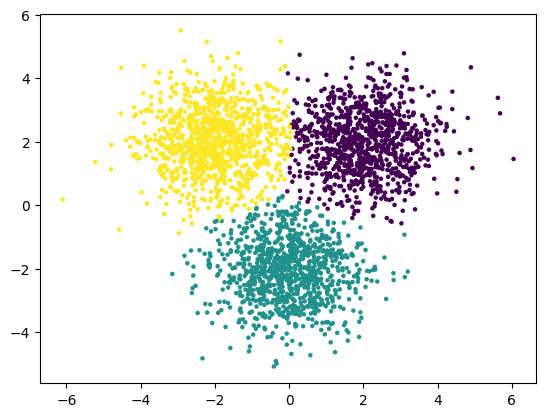

In [26]:
if __name__ == "__main__":
    main()

![alt text](image.png)

## Artificial Neural Net with Back Propagation and Variable Architecture

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Useful functions

In [28]:
def linear(H):
    return H

def ReLU(H):
    return H*(H>0)

def sigmoid(H):
    return 1/(1 + np.exp(-H))

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis=1, keepdims=True)

# Loss Funtions
def cross_entropy(Y, P_hat):
    return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
    return (1/2*len(Y))*np.sum((Y - Y_hat) ** 2)

# Metrics 

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

def R2(y, y_hat):
    return 1 - np.sum((y - y_hat) ** 2)/np.sum((y - y.mean()) ** 2)


# Misc:
def one_hot(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N, K))
    for i in range(N):
        Y[i, y[i]] = 1
    return Y


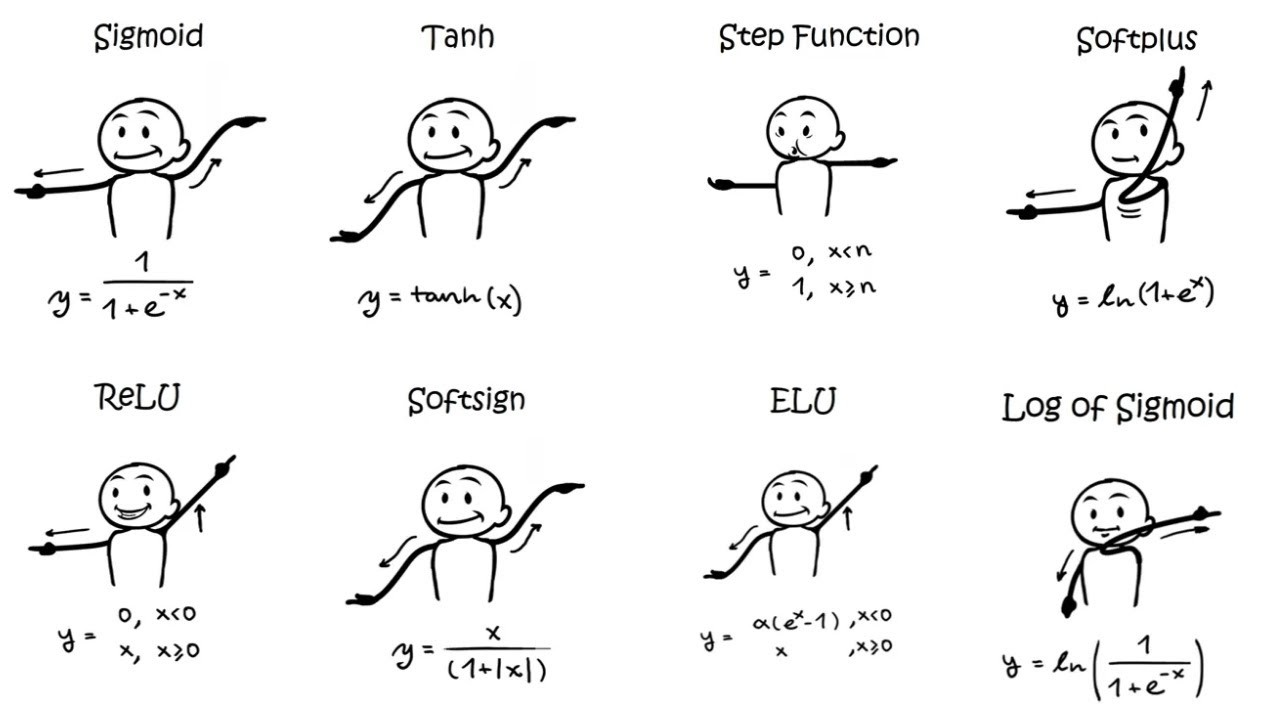

## Derivatives of Activation Functions

In [29]:
def derivative(Z, a):
    if a == linear:
        return 1
    elif a == sigmoid:
        return Z * (1 - Z)
    elif a == np.tanh:
        return 1 - Z*Z
    elif a == ReLU:
        return (Z>0).astype(int)
    else:
        ValueError("Unknown Activation")

## ANN Class

In [36]:
class ANN():

  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture=architecture
    self.activations= activations
    self.L = len(architecture)+1

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs=int(epochs)
    #Classifier, mode=0, Regressor, mode=1
    if self.mode:
      Y=y
      K=1
    else:
      Y =one_hot(y)
      K =Y.shape[1]

    N,D = X.shape

    #Iniatize Weights(and Biases)
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture+[K])),1)}
    self.B = {l: np.random.randn(M) for l,M in enumerate(self.architecture+[K],1)}

    #Activation Setup
    if self.activations is None:
      self.a ={l:ReLU for l in range(1,self.L)}
    else:
      self.a = {l: act for l,act in enumerate(self.activations,1)}

    #Output activation Functions
    if self.mode:
      self.a[self.L]=linear
    else:
      self.a[self.L]=softmax

    #Define Loss
    J = np.zeros(epochs)

    #Training Cycle
    for epoch in range(epochs):
      self.__forward__(X)
      
      if self.mode:
        J[epoch]= OLS(Y, self.Z[self.L])
      else:
        J[epoch]=cross_entropy(Y, self.Z[self.L])
      #Back Prop
      dH = (1/N)*(self.Z[self.L]-Y)
      for l in sorted(self.W.keys(), reverse=True):

        dW = self.Z[l-1].T@dH
        dB = dH.sum(axis=0)
        #Weight Update Rules per layer
        self.W[l] -=eta*dW
        self.B[l] -=eta*dB

        if l>1:
          dZ =dH@self.W[l].T
          dH = dZ*derivative(self.Z[l-1],self.a[l-1])
        
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def __forward__(self, X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

<>:66: SyntaxWarning: invalid escape sequence '\m'
<>:66: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Younes Abaroudi\AppData\Local\Temp\ipykernel_7788\1668517087.py:66: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{J}$")


(....)

In [38]:
my_list = ["banana", "apple", "orange"]
for l, name in enumerate(my_list):
    print(l, name)

0 banana
1 apple
2 orange


In [44]:
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF" ])
cmap_light = ListedColormap(["#FFBBBB", "#BBFFBB", "#BBBBFF" ])

### Implementation of ANN Class

In [33]:
def main_class():
    D = 2
    K = 3
    N = int(K*1e3)

    X0 = np.random.randn((N//K),D) + np.array([2,2])
    X1 = np.random.randn((N//K),D) + np.array([0,-2])
    X2 = np.random.randn((N//K),D) + np.array([-2,2])
    X = np.vstack((X0,X1,X2))

    y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

    plt.figure()
    plt.scatter(X[:,0],X[:,1], c=y, s=6, alpha=0.6)

    # my_ann_classifier = ANN(architecture=[6,4], activations=[np.tanh,ReLU])

    my_ann_classifier = ANN(architecture=[6,4], activations=[np.tanh,ReLU])
    my_ann_classifier.fit(X,y, eta=1e-3, epochs=1e4, show_curve=True)
    y_hat=my_ann_classifier.predict(X)

    print(my_ann_classifier.W)
    print(my_ann_classifier.B)
    print(f"Training Accuracy:  {accuracy(y,y_hat):0.4f}")

    x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
    x2 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000)

    xx1, xx2 = np.meshgrid(x1, x2)
    Z = my_ann_classifier.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)

    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
    plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold,alpha=0.2)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()

    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y_hat,s=6)

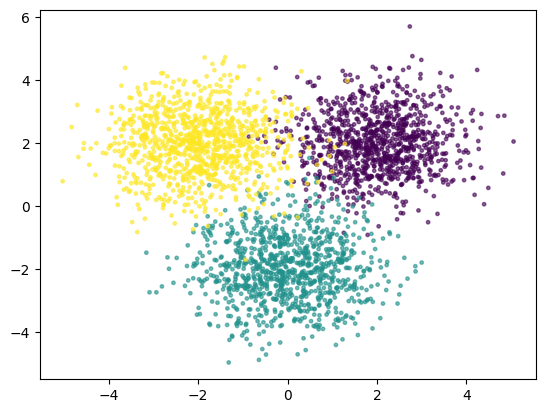

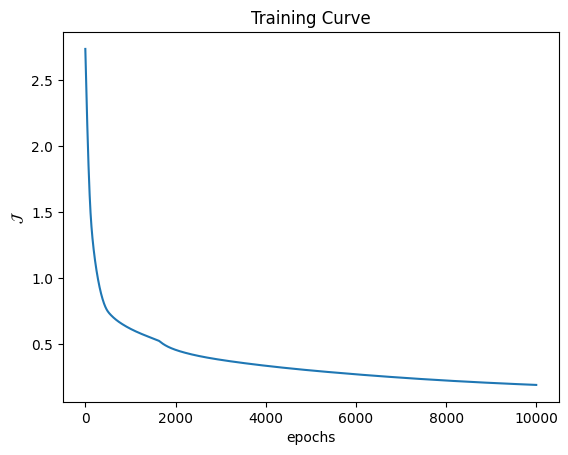

{1: array([[-0.85564978, -0.01066328,  0.97291125, -0.20564422, -0.33165053,
        -0.8403201 ],
       [ 1.08621663,  1.65385939,  0.62889342, -0.25782403, -0.37683119,
         0.2543849 ]]), 2: array([[ 1.23016101, -0.69609953,  1.78946086,  0.92948611],
       [ 0.54528456,  0.59761425, -1.23409048,  0.06056252],
       [-0.31905086,  1.19633588,  1.74680657, -2.79000358],
       [ 0.44008585, -0.22142066,  1.64684078,  1.37611979],
       [ 0.83984392, -0.69626939, -0.67011901, -1.19889394],
       [ 0.4410994 , -0.47220289,  0.94097228, -0.11717159]]), 3: array([[ 1.33022682, -2.44112557, -0.29931036],
       [ 1.11722767, -1.63535365, -0.14319098],
       [ 1.41985292, -0.36859695,  0.11658628],
       [-2.53263909,  0.7098117 ,  0.31882011]])}
{1: array([-0.43531546,  1.42194581, -1.34518015, -1.72011485,  0.91459385,
       -1.07878685]), 2: array([ 0.25045356, -0.09745499, -1.53482039,  1.80976786]), 3: array([-0.58104231,  0.46692666, -0.90236742])}
Training Accuracy:  0.9

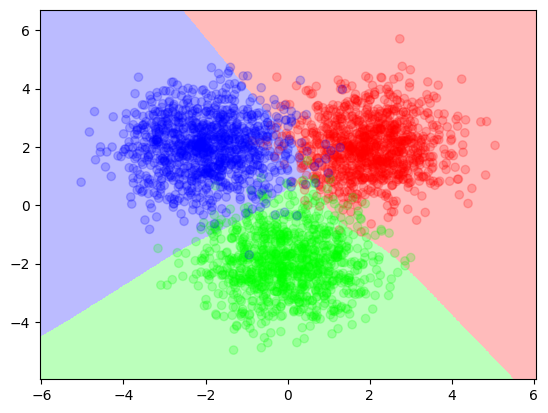

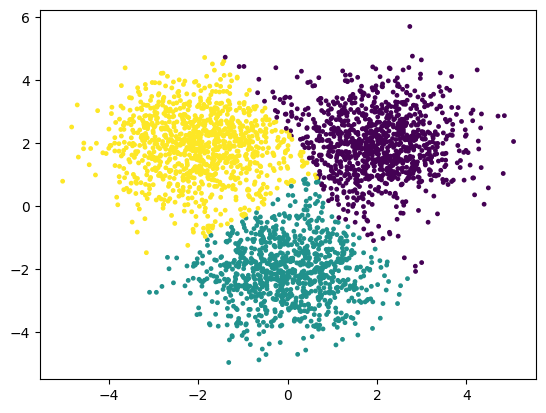

In [45]:
if __name__ == "__main__":
    main_class()